# VIRTUAL COMPETITION

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [293]:
train=pd.read_csv(r"C:\Users\hp\Desktop\train_ctrUa4K (1).csv")
test=pd.read_csv(r"C:\Users\hp\Desktop\test_lAUu6dG (1).csv")

In [294]:
train_original=train.copy()
test_original=test.copy()

In [295]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [296]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [297]:
train.shape

(614, 13)

In [298]:
test.shape

(367, 12)

In [299]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Filling missing term

In [300]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [301]:
for i in ['Gender', 'Married', 'Dependents','Self_Employed']:
    train[i]=train[i].fillna(train[i].mode()[0])
for i in ['LoanAmount','Loan_Amount_Term', 'Credit_History']:
    train[i]=train[i].fillna(train[i].median())

In [302]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [303]:
for i in ['Gender','Dependents','Self_Employed']:
    test[i]=test[i].fillna(test[i].mode()[0])
for i in ['LoanAmount','Loan_Amount_Term', 'Credit_History']:
    test[i]=test[i].fillna(test[i].median())

# Exploratory Data Analysis

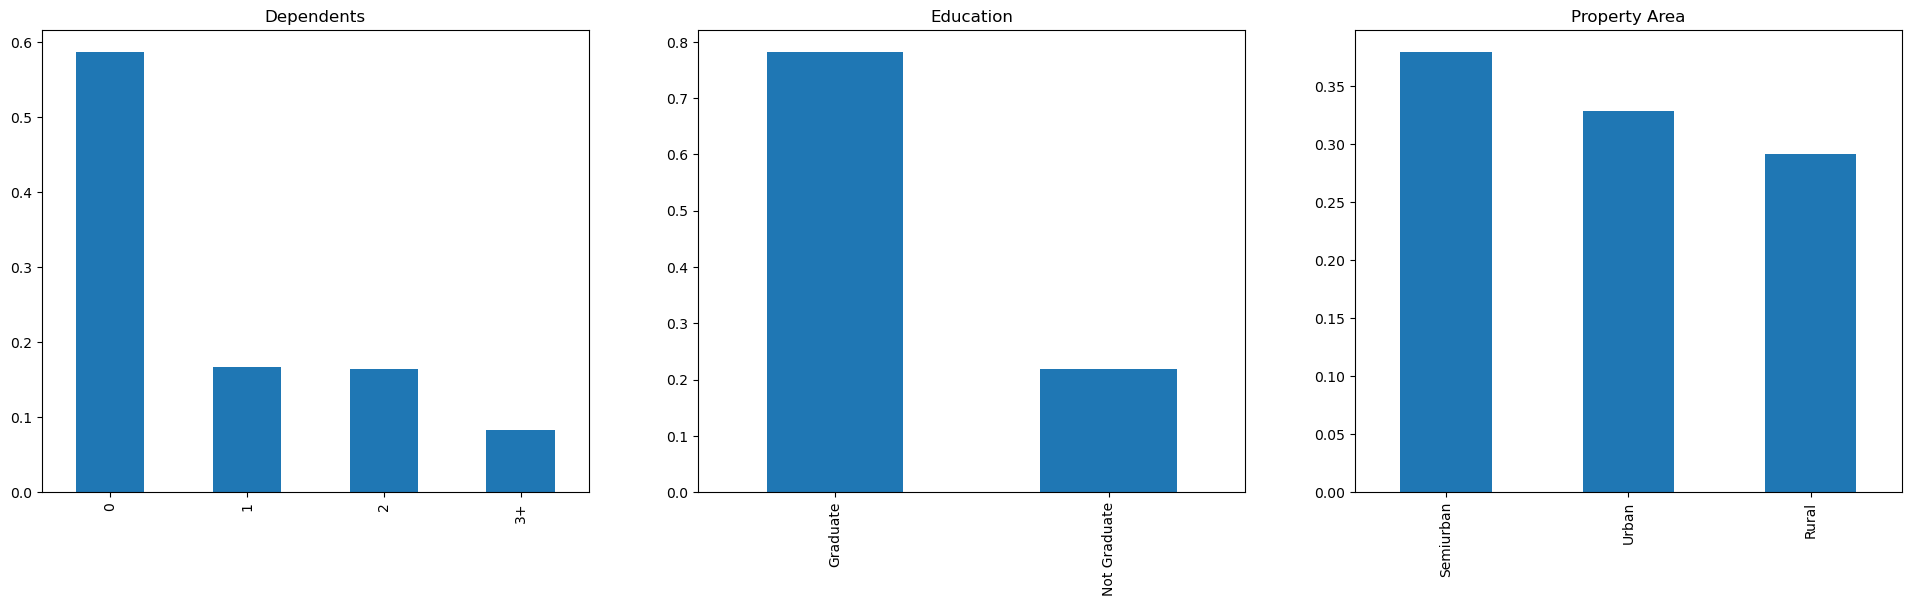

In [304]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property Area')
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

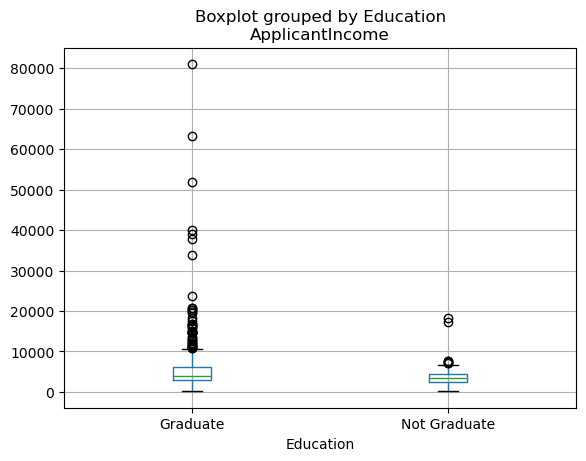

In [305]:
train.boxplot(column='ApplicantIncome',by='Education')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


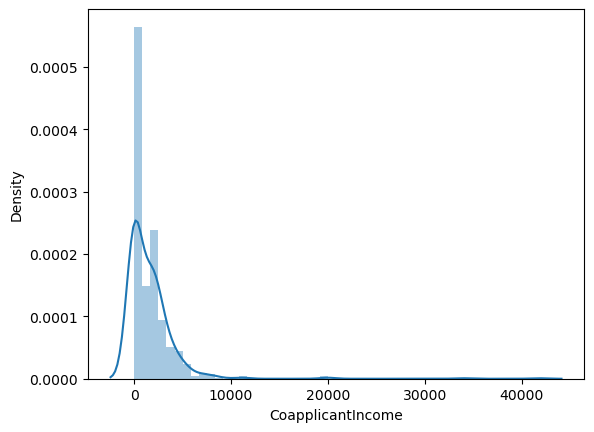

In [306]:
sns.distplot(train['CoapplicantIncome'])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


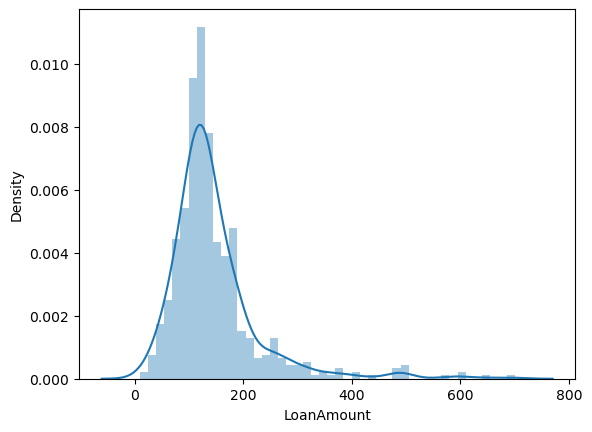

In [307]:
sns.distplot(train['LoanAmount'])
plt.show()

<AxesSubplot:xlabel='Gender'>

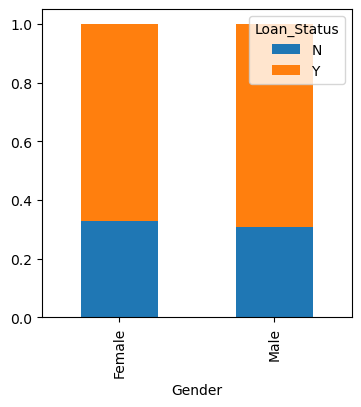

In [308]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

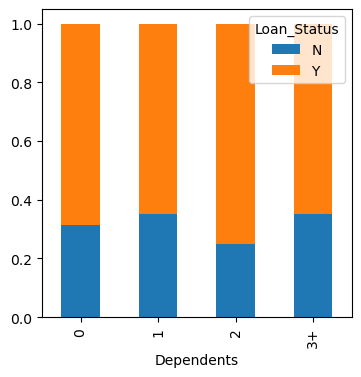

In [309]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

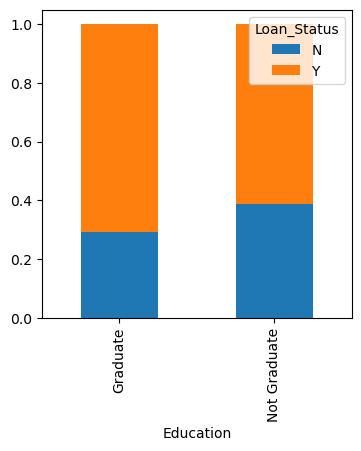

In [310]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

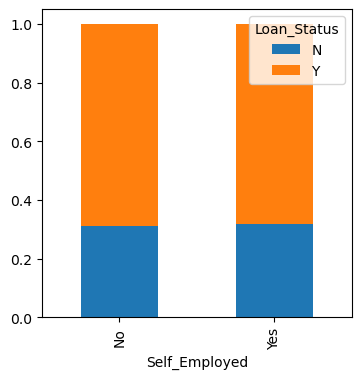

In [311]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

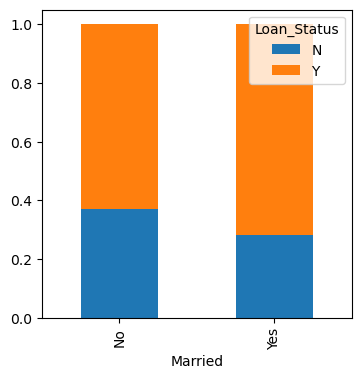

In [312]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

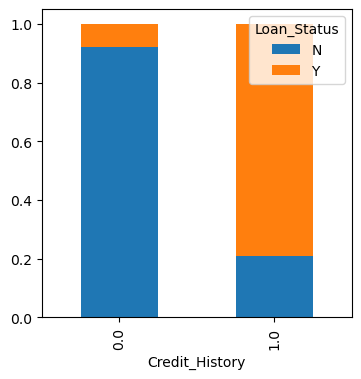

In [313]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

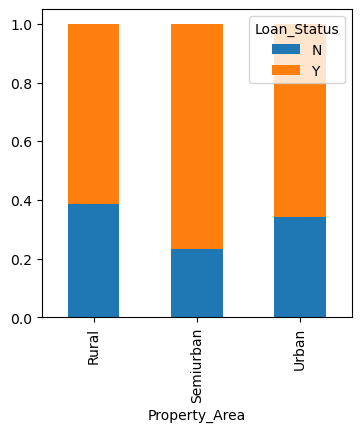

In [314]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

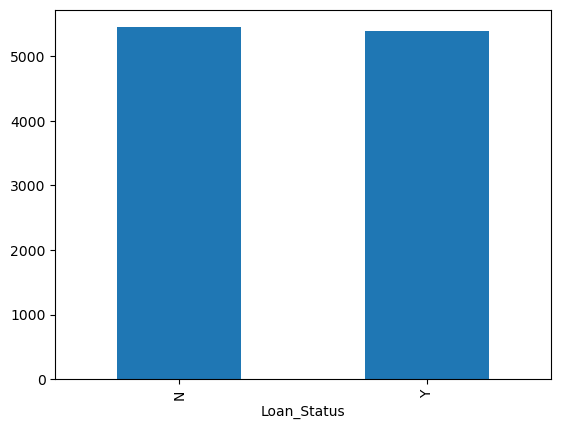

In [315]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We observe that credit history has a greater impact on ones chances to get his/her loan approved. Other influential factors are Number of dependents, marriage status, Property area, Education.

# Prepocessing

Working on train file

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

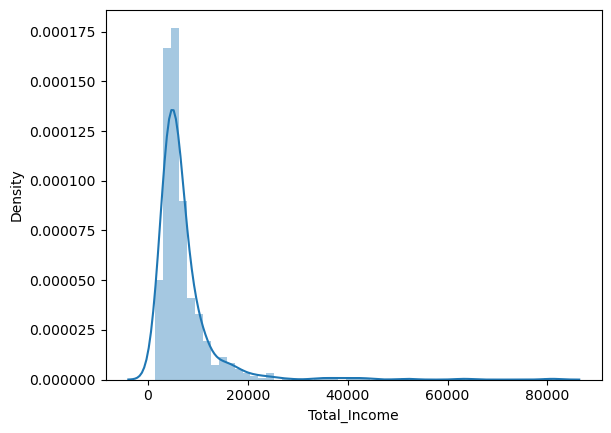

In [316]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
sns.distplot(train['Total_Income'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMI', ylabel='Density'>

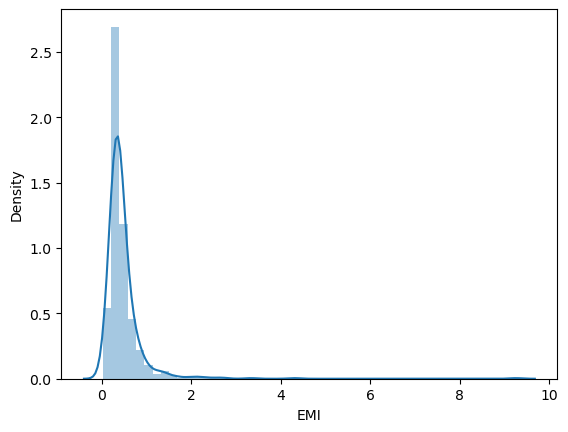

In [317]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
sns.distplot(train['EMI'])

In [318]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)

In [319]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'],axis=1)

In [320]:
#numerical
x1=train.drop(['Loan_ID','Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status'],axis=1)
#categorical
x2=train.drop(['Total_Income','EMI','Balance Income','Loan_ID', 'Credit_History','Loan_Status'],axis=1)
#target
y=train['Loan_Status']

In [321]:
#minmax scaling
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1))
x1_m=minmax.fit_transform(x1)
type(x1_m)

numpy.ndarray

In [322]:
x1.columns

Index(['Credit_History', 'Total_Income', 'EMI', 'Balance Income'], dtype='object')

In [323]:
x1_m=pd.DataFrame(x1_m,columns=['Credit_History', 'Total_Income', 'EMI', 'Balance Income'])

In [324]:
x=pd.concat([x2,x1_m],axis=1)

In [325]:
# Giving numerical values to object column values
x=x.replace({'Loan_Status':{'Y':1,'N':0},'Gender':{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},'Dependents':{'0':0,'1':1,'2':2,'3+':3},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}})

Working on test file

In [326]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [327]:
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [328]:
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

In [329]:
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'],axis=1)

In [331]:
#numerical
test_1=test.drop(['Loan_ID','Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area'],axis=1)
#categorical
test_2=test.drop(['Total_Income','EMI','Balance Income','Loan_ID', 'Credit_History'],axis=1)

In [332]:
#minmax scaling
from sklearn.preprocessing import MinMaxScaler
minmax_test=MinMaxScaler(feature_range=(0,1))
test_1_m=minmax.fit_transform(test_1)
type(test_1_m)

numpy.ndarray

In [335]:
test_1.columns

Index(['Credit_History', 'Total_Income', 'EMI', 'Balance Income'], dtype='object')

In [336]:
test_1_m=pd.DataFrame(test_1_m,columns=['Credit_History', 'Total_Income', 'EMI', 'Balance Income'])

In [338]:
test=pd.concat([test_2,test_1_m],axis=1)

In [340]:
# Giving numerical values to object column values
test=test.replace({'Loan_Status':{'Y':1,'N':0},'Gender':{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},'Dependents':{'0':0,'1':1,'2':2,'3+':3},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}})

Splitting train file

In [341]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Logistic Regression

In [342]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7886178861788617


In [343]:
pred_test=model.predict(test)

In [345]:
submission=pd.read_csv(r"C:\Users\hp\Desktop\sample_submission_49d68Cx (1).csv")

In [348]:
submission['Loan_Status']=pred_test

In [349]:
submission['Loan_ID']=test_original['Loan_ID']

In [350]:
submission.to_csv(r"C:\Users\hp\Desktop\Loan_Prediction_c.csv",index=False)